## Beispiel 4.2: Berechnung von Gleichgewichtskonstanten

### Laden der benötigten Pakete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition der Arrays

In [2]:
comps = np.linspace(0,2,3) # 0: N2, 1: H2, 2: NH3
nu = np.array((comps))
cp = np.array((comps))
H_f = np.array((comps))
S_g = np.array((comps))

### Definition der Werte

In [3]:
# Stöchiometrische Koeffizienten
nu[0] = -1 # -
nu[1] = -3 # -
nu[2] = 2 # -

# Daten von https://webbook.nist.gov/chemistry (2017)
# Wärmekapazität
cp[0] = 29.1 # J / (mol * K)
cp[1] = 28.8 # J / (mol * K)
cp[2] = 35.1 # J / (mol * K)

# Bildungsenthalpie
H_f[0] = 0 # J / (mol)
H_f[1] = 0 # J / (mol)
H_f[2] = -45.9e3 # J / (mol)

# Entropie
S_g[0] = 191.61 # J / (mol * K)
S_g[1] = 130.68 # J / (mol * K)
S_g[2] =  192.77 # J / (mol * K)

### Berechnung der Reaktionsdaten

In [4]:
Delta_R_cp_S = np.dot(nu,cp) # J / (mol * K)
Delta_R_H_S = np.dot(nu,H_f) # J / (mol * K)
Delta_R_S_S = np.dot(nu,S_g) # J / (mol * K)

### Definitionen / Konstanten

In [5]:
T_range = np.linspace(273.15 + 400, 273.15 + 500, 101) # K - Temperaturbereich
T_S = 298.15 # K - Referenztemperatur
p_S = 1e5 # Pa - Referenzdruck
R = 8.314 # J (mol * K) - Universelle Gaskonstante

### Funktionen

In [6]:
# Reaktionsenthalpie
def Delta_R_H(T):
    return (Delta_R_H_S + Delta_R_cp_S * (T - T_S))

# Reaktionsentropie
def Delta_R_S(T):
    return (Delta_R_S_S + Delta_R_cp_S * np.log(T/T_S))

# Freie Reaktionsenthalpie
def Delta_R_G(T):
    return( Delta_R_H(T) - T * Delta_R_S(T))

# K_S
def K_S(T):
    return( np.exp( -Delta_R_G(T) / (R * T) ) )

# K_p
def K_p(T,p):
    return (K_S(T) * (p/p_S)**2 )

### Darstellung der Ergebnisse

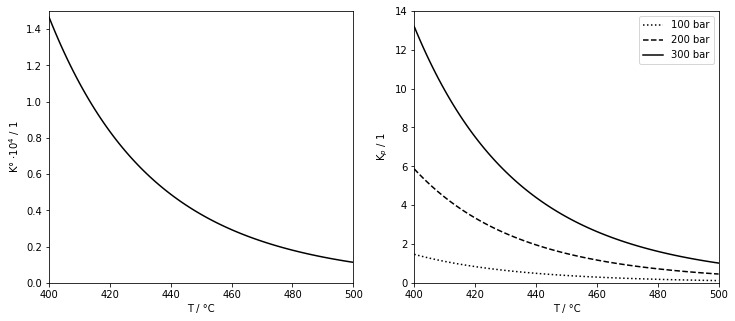

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# K_s
ax1.plot(T_range-273.15, K_S(T_range)*1e4, color='black')
ax1.set_xlabel("T / °C")
ax1.set_ylabel("K$°$ $\cdot 10^{4}$ / 1")
ax1.set_xlim(400,500)
ax1.set_ylim(0,1.5)

# K_p
ax2.plot(T_range-273.15, K_p(T_range, 100e5), color='black', linestyle='dotted', label="100 bar")
ax2.plot(T_range-273.15, K_p(T_range, 200e5), color='black', linestyle='dashed', label="200 bar")
ax2.plot(T_range-273.15, K_p(T_range, 300e5), color='black', linestyle='solid', label="300 bar")
ax2.set_xlabel("T / °C")
ax2.set_ylabel("K$_{p}$ / 1")
ax2.set_xlim(400,500)
ax2.set_ylim(0,14)
ax2.legend(loc='best')

plt.show()